# Boxplots of "No Pass Net" for CIFAR10

Network:
- ResNet structure without the shortcuts

Methods:
- D4DD with PARAFAC decomposition for rank 1,2 and 3, depth 8, 16, 24, 32 
- D4DD with Tucker2 decomposition for rank 1,2 and 3, depth 8, 16, 24, 32 
- Full network for rank 1, depth 8, 16, 24, 32
- D3DD for rank 1, depth 8, 16, 24, 32

For each depth the training is repeated 5 times, as the training will have same variance. 
The training pass is executed until the .. reach 0.975.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Function to find the last number for each row that is not a NAN
def f(x):
    if x.last_valid_index() is None:
        return np.nan
    else:
        return x[x.last_valid_index()]
    
sep = (12*5)

# D4DD comparing

In [31]:
#Import results and separate into train, test and loss. Find last accuracy.
initDF_P = pd.read_csv('0704_CIFAR10_no_pass_net_D4DD_rank123.csv', header = None)
trainDF_P = initDF_P[0:sep]
testDF_P = initDF_P[sep+1:sep*2]
lossDF_P = initDF_P[sep*2:-1]
trainDF_P['last'] = trainDF_P.apply(f, axis=1)
testDF_P['last'] = testDF_P.apply(f, axis=1)
lossDF_P['last'] = lossDF_P.apply(f, axis=1)

initDF_T2 = pd.read_csv('CIFAR10_no_pass_net_Tucker2_ranks.csv', header = None) 
sep = (12*5)
trainDF_T2 = initDF_T2[0:sep]
testDF_T2 = initDF_T2[sep+1:sep*2]
lossDF_T2 = initDF_T2[sep*2:-1]
trainDF_T2['last'] = trainDF_T2.apply(f, axis=1)
testDF_T2['last'] = testDF_T2.apply(f, axis=1)
lossDF_T2['last'] = lossDF_T2.apply(f, axis=1)

<ipython-input-31-e3f6664d5ca0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainDF_P['last'] = trainDF_P.apply(f, axis=1)
<ipython-input-31-e3f6664d5ca0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testDF_P['last'] = testDF_P.apply(f, axis=1)
<ipython-input-31-e3f6664d5ca0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [37]:
c1 = 0
c2 = 5  
train_list_P = [] 
test_list_P = [] 
loss_list_P = [] 
train_list_T2 = [] 
test_list_T2 = [] 
loss_list_T2 = [] 
while c2 <= 60:
    temp_train_P = trainDF_P["last"].values[c1:c2]
    temp_test_P = testDF_P["last"].values[c1:c2]
    temp_loss_P = lossDF_P["last"].values[c1:c2]
    train_list_P.append(temp_train_P)
    test_list_P.append(temp_test_P)
    loss_list_P.append(temp_loss_P)
    temp_train_T2 = trainDF_T2["last"].values[c1:c2]
    temp_test_T2 = testDF_T2["last"].values[c1:c2]
    temp_loss_T2 = lossDF_T2["last"].values[c1:c2]
    train_list_T2.append(temp_train_T2)
    test_list_T2.append(temp_test_T2)
    loss_list_T2.append(temp_loss_T2)
    c1 = c2
    c2 = c2+5
train_box_P = pd.DataFrame(train_list_P).transpose()
test_box_P = pd.DataFrame(test_list_P).transpose()
loss_box_P = pd.DataFrame(loss_list_P).transpose()
train_box_T2 = pd.DataFrame(train_list_T2).transpose()
test_box_T2 = pd.DataFrame(test_list_T2).transpose()
loss_box_T2 = pd.DataFrame(loss_list_T2).transpose()

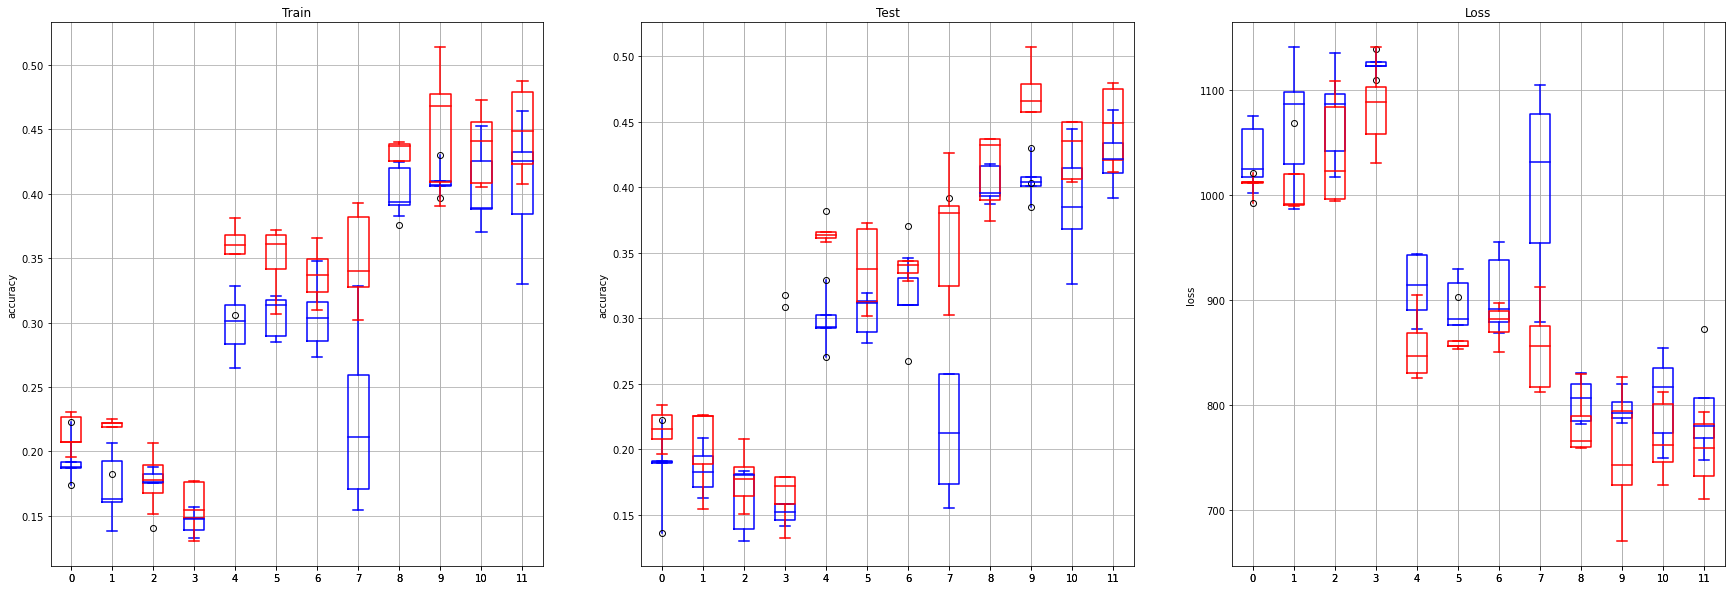

In [70]:
fig, axes = plt.subplots(1,3, figsize=(30,10))

#boxprops_P = dict(linestyle='-', linewidth=2, color='b')
#medianprops_P = dict(linestyle='-', linewidth=2, color='b')
l_df_P = [train_box_P, test_box_P, loss_box_P]
#boxprops_T2 = dict(linestyle='-', linewidth=2, color='r')
#medianprops_T2 = dict(linestyle='-', linewidth=2, color='r')
l_df_T2 = [train_box_T2, test_box_T2, loss_box_T2]
tits = ["Train", "Test", "Loss"]
ylabs = ["accuracy", "accuracy", "loss"]

for l in range(3):
    a = l_df_P[l].boxplot(boxprops=dict(linestyle='-', linewidth=1.5, color='b'),
                         flierprops=dict(linestyle='-', linewidth=1.5, color='b'),
                         medianprops=dict(linestyle='-', linewidth=1.5, color='b'),
                         whiskerprops=dict(linestyle='-', linewidth=1.5, color='b'),
                         capprops=dict(linestyle='-', linewidth=1.5, color='b'),
                         ax=axes.flatten()[l])
    b = l_df_T2[l].boxplot(boxprops=dict(linestyle='-', linewidth=1.5, color='r'),
                         flierprops=dict(linestyle='-', linewidth=1.5, color='r'),
                         medianprops=dict(linestyle='-', linewidth=1.5, color='r'),
                         whiskerprops=dict(linestyle='-', linewidth=1.5, color='r'),
                         capprops=dict(linestyle='-', linewidth=1.5, color='r'), 
                         ax=axes.flatten()[l])
    axes[l].set_title(tits[l])
    axes[l].set_ylabel(ylabs[l])

plt.show()

# Full and D3DD comparing

In [17]:
initDF_full3D = pd.read_csv('nopassnet_full_and_3D.csv', header = None) 
initDF_full3D['last'] = initDF_full3D.apply(f, axis=1)
sep1 = 20
trainDF_full = initDF_full3D[0:sep1]
trainDF_D3DD = initDF_full3D[sep1:sep1*2]
testDF_full = initDF_full3D[sep1*2:sep1*3]
testDF_D3DD = initDF_full3D[sep1*3:sep1*4]
lossDF_full = initDF_full3D[sep1*4:sep1*5]
lossDF_D3DD = initDF_full3D[sep1*5:sep1*6]

In [62]:
c1 = 0
c2 = 5  
train_list_full = [] 
test_list_full = [] 
loss_list_full = [] 
train_list_D3DD = [] 
test_list_D3DD = [] 
loss_list_D3DD = [] 
while c2 <= 20:
    temp_train_full = trainDF_full["last"].values[c1:c2]
    temp_test_full = testDF_full["last"].values[c1:c2]
    temp_loss_full = lossDF_full["last"].values[c1:c2]
    train_list_full.append(temp_train_full)
    test_list_full.append(temp_test_full)
    loss_list_full.append(temp_loss_full)
    temp_train_D3DD = trainDF_D3DD["last"].values[c1:c2]
    temp_test_D3DD = testDF_D3DD["last"].values[c1:c2]
    temp_loss_D3DD = lossDF_D3DD["last"].values[c1:c2]
    train_list_D3DD.append(temp_train_D3DD)
    test_list_D3DD.append(temp_test_D3DD)
    loss_list_D3DD.append(temp_loss_D3DD)
    c1 = c2
    c2 = c2+5
train_box_full = pd.DataFrame(train_list_full).transpose()
test_box_full = pd.DataFrame(test_list_full).transpose()
loss_box_full = pd.DataFrame(loss_list_full).transpose()
train_box_D3DD = pd.DataFrame(train_list_D3DD).transpose()
test_box_D3DD = pd.DataFrame(test_list_D3DD).transpose()
loss_box_D3DD = pd.DataFrame(loss_list_D3DD).transpose()

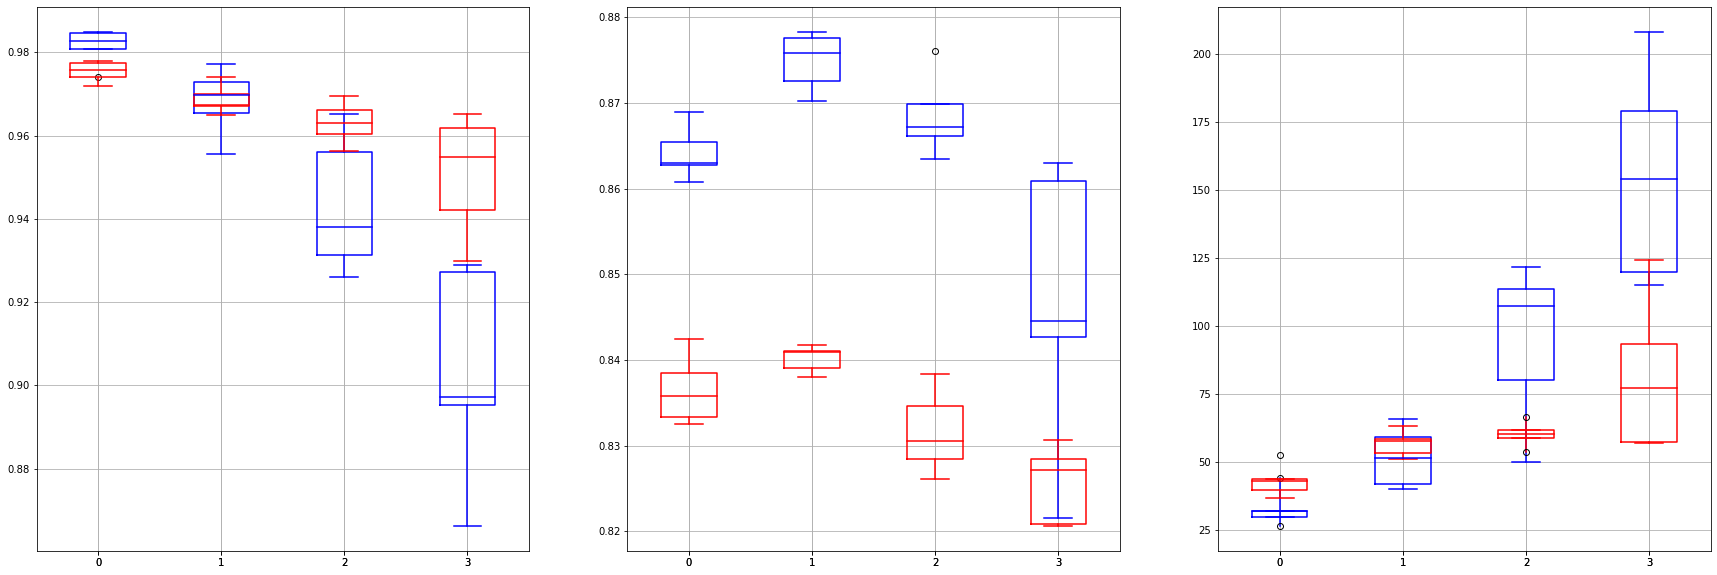

In [63]:
fig, axes = plt.subplots(1,3, figsize=(30,10))

l_df_full = [train_box_full, test_box_full, loss_box_full]
l_df_D3DD = [train_box_D3DD, test_box_D3DD, loss_box_D3DD]

for l in range(3):
    a = l_df_full[l].boxplot(boxprops=dict(linestyle='-', linewidth=1.5, color='b'),
                         flierprops=dict(linestyle='-', linewidth=1.5, color='b'),
                         medianprops=dict(linestyle='-', linewidth=1.5, color='b'),
                         whiskerprops=dict(linestyle='-', linewidth=1.5, color='b'),
                         capprops=dict(linestyle='-', linewidth=1.5, color='b'),
                         ax=axes.flatten()[l])
    b = l_df_D3DD[l].boxplot(boxprops=dict(linestyle='-', linewidth=1.5, color='r'),
                         flierprops=dict(linestyle='-', linewidth=1.5, color='r'),
                         medianprops=dict(linestyle='-', linewidth=1.5, color='r'),
                         whiskerprops=dict(linestyle='-', linewidth=1.5, color='r'),
                         capprops=dict(linestyle='-', linewidth=1.5, color='r'), 
                         ax=axes.flatten()[l])

plt.show()